In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
#Regressão Linear

dados = {
    'idade': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'altura':[0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.9,0.95,1.0,1.0,1.1,1.3,1.32,1.5,1.6,1.62,1.75,1.80, 1.85],
    'peso': [1,3,12,16,17,20,30,32,32,30,33,32,40,45,52,56,62,59,75,82],
}

df1 = pd.DataFrame(dados)
df1.head(3)

,idade,altura,peso
0,1,0.3,1
1,2,0.4,3
2,3,0.5,12


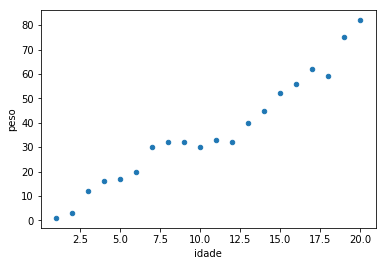

In [4]:
df1.plot(x='idade',y='peso',kind = 'scatter')

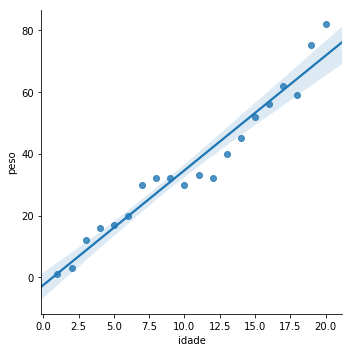

In [5]:
sns.lmplot(x='idade',y='peso',data = df1)

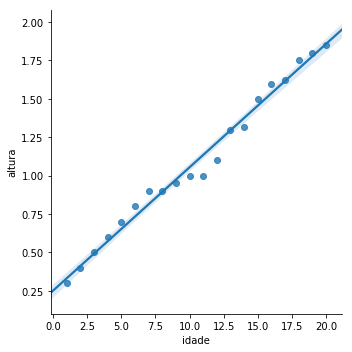

In [6]:
sns.lmplot(x='idade',y='altura',data = df1)

In [7]:

#DICA: SE VOCÊ CHAMAR X = df['idade'] ele cria um Array... e dá problema quando for fazer a regressão linear
X = df1[['idade','altura']]#Coloquei a coluna da idade e altura aqui (ex: faça o teste X = df1['idade'] para ver a diferença)
#ou
#X = df1.drop(['peso'],axis=1)# Retira a coluna peso


y = df1[['peso']]# E a do peso aqui

#Organizar os dados para o treinamento (guardar os arquivos)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X,#Características dos dados
    y,# Dados que
    test_size=0.3,# 30% dos dados ficarão fora do treino e irão para os respectivos X_test e y_test
    #de maneira aleatória
)

print(len(X_train),len(y_train)) # 70% dos dados das respectivas colunas
print(len(X_test),len(y_test)) # 30% dos dados das respectivas colunas

14 14
6 6


In [8]:
X_train.head(3)

,idade,altura
3,4,0.6
0,1,0.3
2,3,0.5


In [9]:
X_test.head(3)

,idade,altura
18,19,1.80
19,20,1.85
16,17,1.62


In [10]:
y_train.head(3)

,peso
3,16
0,1
2,12


In [11]:
y_test.head(3)

,peso
18,75
19,82
16,62


In [12]:
# Treinar os dados pelo modelo de Regressão Linear
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [13]:
y_train.head(1) # Aqui não entra ainda a coluna 'pred'

,peso
3,16


In [20]:
train_x = lm.fit(X_train,y_train)

pred = train_x.predict(X_train) # predic do peso



# Não há necessidade em criar ... o y_train já é isso.
dispersao = pd.DataFrame(y_train) # PEso real
dispersao['Pred'] = pred

In [21]:
y_train.head(1) # Ao usar a função Pred, ele acrescenta na tabela y_train e y_test uma nova coluna ("Pred")

,peso,Pred
3,16,14.006381


In [16]:
#dispersao

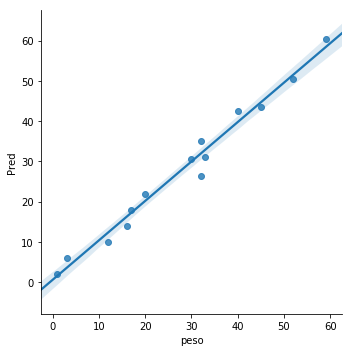

In [25]:
sns.lmplot(x = 'peso',y = 'Pred', data = y_train)

In [ ]:
X_train

In [ ]:
lm.score(X_train,y_train['peso'])

In [ ]:
lm.score(X_train,y_train['Pred'])

In [ ]:
lm.score(X_test,y_test)

In [ ]:
X_test